# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
from joblib import dump, load
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

# Read and Merge Data

Now after we have done everything from designing features to prepare data, it's time for training, we shall use SGDClassifier for and I am goona explain why later, but first we shall read the data and merge it in one numpy array to feed it to our model.

### Reading Validation Data

I am gonna read first the validation data and delay reading train data because of the size of train data we are gonna deal with it in different way, but as validatiaon data is relatively small I am gonna process it in the traditional way.

In [ ]:
# Reading Validation Data
x_valid_1 = pd.read_csv("x_valid_1.csv")
x_valid_2 = pd.read_csv("x_valid_2.csv")
x_valid_3 = pd.read_csv("x_valid_3.csv")

# Reading the removed indices array from validation dataframes
valid_removed = np.load("valid_removed.npy")

# Dropping the rows at specific indices
x_valid_1.drop(index = valid_removed, axis = 0, inplace = True)
x_valid_2.drop(index = valid_removed, axis = 0, inplace = True)
x_valid_3.drop(index = valid_removed, axis = 0, inplace = True)

In [ ]:
cols = np.hstack((x_valid_1.columns.values, x_valid_2.columns.values, x_valid_3.columns.values))

In [ ]:
x_valid_1 = np.array(x_valid_1)
x_valid_2 = np.array(x_valid_2)
x_valid_3 = np.array(x_valid_3)

# Reading validation embedding arrays
valid_embedding = np.load("valid_embedding.npy")

# Reading label from org_valid dataframe
y_val = pd.read_csv("org_valid.csv", usecols = ["label"])
y_val.drop(index = valid_removed, axis = 0, inplace = True)

In [ ]:
# Getting the final validation data arrays
x_valid = np.hstack((x_valid_1, x_valid_2, x_valid_3, valid_embedding))

In [ ]:
print("Number of rows in validation data =", x_valid.shape[0])
print("Number of columns in validation data =", x_valid.shape[1])

Number of rows in validation data = 487328
Number of columns in validation data = 101


### Reading Train Data

In [ ]:
# Reading the removed indices array from train dataframes
train_removed = np.load("train_removed.npy")

In [ ]:
# Reading Train Data
x1 = pd.read_csv("x_train_1.csv")
x2 = pd.read_csv("x_train_2.csv")
x3 = pd.read_csv("x_train_3.csv")

# Droping unwanted rows to match the shape with train embedding array
x1.drop(index = train_removed, axis = 0, inplace = True)
x2.drop(index = train_removed, axis = 0, inplace = True)
x3.drop(index = train_removed, axis = 0, inplace = True)

In [ ]:
# Convert Train pandas dataframes into numpy array
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

np.save("x1.npy", x1)
np.save("x2.npy", x2)
np.save("x3.npy", x3)

In [ ]:
# Reading Train lables
y_train = pd.read_csv("org_train.csv", usecols = ["label"])
y_train.drop(index = train_removed, axis = 0, inplace = True)

In [ ]:
# This is for further using, one can restart the session and start from here
# This way the arrays will not load entierly into the memroy 
# Those arrays  will stay on the hard disk hence save ram from collapsing because of the large size of train data
x = np.load("train_embedding.npy", mmap_mode = 'r')
x1 = np.load("x1.npy", mmap_mode = 'r')
x2 = np.load("x2.npy", mmap_mode = 'r')
x3 = np.load("x3.npy", mmap_mode = 'r')

In [ ]:
# Design the final train array and store it on the disk
x_train = np.memmap("test", dtype = np.float32, mode = 'w+', shape = (len(x1), 101), order = 'F')

In [ ]:
# Adding the information from our feaures array to final train array

# getting information from x_train_1
x_train[:, :23] = x1 

# getting information from x_train_2
x_train[:, 23:30] = x2

# getting information from x_train_3
x_train[:, 30:37] = x3

# getting information from train embedding
x_train[:, 37:] = x

# Train ML Model

In [ ]:
c = 0
model = SGDClassifier(loss = "log", alpha = 0.00001, max_iter = 3000, tol = 0.000001, n_jobs = -1, verbose = 1)
for iter in range(500):
  for i in range(5):
    x = x_train[c : (c + 5000000), :]
    y_t = y_train[c : (c + 5000000)]
    if x.shape[0] == 0:
      c = 0
      break
    model.partial_fit(x, y_t, classes = [0, 1])
    c += 5000000

Streaming output truncated to the last 5000 lines.
Norm: 138.75, NNZs: 101, Bias: 11.616315, T: 5000000, Avg. loss: 1.318905
Total training time: 5.82 seconds.
-- Epoch 1
Norm: 138.45, NNZs: 101, Bias: 11.504823, T: 5000000, Avg. loss: 1.105897
Total training time: 5.82 seconds.
-- Epoch 1
Norm: 138.37, NNZs: 101, Bias: 11.536547, T: 1434117, Avg. loss: 1.151895
Total training time: 1.54 seconds.
-- Epoch 1
Norm: 138.05, NNZs: 101, Bias: 11.574730, T: 5000000, Avg. loss: 1.119915
Total training time: 5.76 seconds.
-- Epoch 1
Norm: 137.77, NNZs: 101, Bias: 11.538828, T: 5000000, Avg. loss: 1.241103
Total training time: 5.84 seconds.
-- Epoch 1
Norm: 137.61, NNZs: 101, Bias: 11.519363, T: 5000000, Avg. loss: 1.585496
Total training time: 5.76 seconds.
-- Epoch 1
Norm: 137.51, NNZs: 101, Bias: 11.595119, T: 1434117, Avg. loss: 1.817022
Total training time: 1.56 seconds.
-- Epoch 1
Norm: 137.22, NNZs: 101, Bias: 11.688848, T: 5000000, Avg. loss: 1.259394
Total training time: 5.76 seconds.


In [ ]:
dump(model, 'model/model.joblib') 
# For Loading the model later
# model = load('model/model.joblib') 

# Testing Model Performance

In [ ]:
# To hold the prediction of batches of size 50000
temp = []
c = 0
for i in range(500):
    x = x_train[c : (c + 50000), :]
    if x.shape[0] == 0:
      c = 0
      break
    c += 50000
    # append the prediction to temp list, we are gonna extend this list later
    temp.append(model.predict(x))

In [ ]:
# extend temp list (list of list) to make it as one list
y_pred = []
for lst in temp:
  y_pred.extend(lst)

In [ ]:
print("The accuracy score of train data =", accuracy_score(y_train, y_pred) * 100)

The accuracy score of train data = 93.38398284495601


In [ ]:
print("The accuracy score of validation data =", accuracy_score(y_val, model.predict(x_valid)) * 100)

The accuracy score of validation data = 93.53412896447567


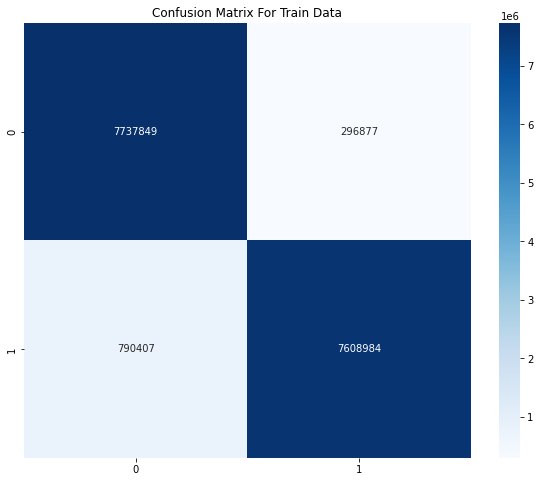

In [ ]:
# Getting Confusion matrix for Train Data
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix For Train Data")
plt.show()

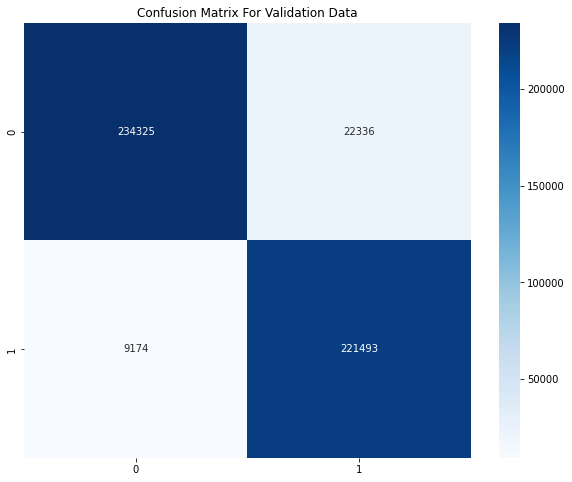

In [ ]:
# Getting Confusion matrix for Validation Data 
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(model.predict(x_valid), y_val), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix For Validation Data")
plt.show()

These results look good, but we can't understand how relatively good is it without calculating the percentage of this results due to the whole training and validataion set, so let's calculating the relative precesion and recall for training and validatation datasets.

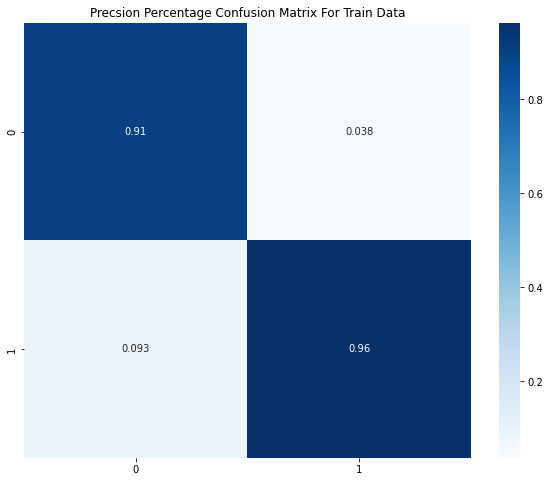

In [ ]:
# precision percentage confusion matrix for training data for class 1 and class 0
CM = confusion_matrix(y_train, y_pred)
CM = CM / CM.sum(axis = 0)
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Precsion Percentage Confusion Matrix For Train Data")
plt.show()

On train data, we have 3.8% of data which is 0 (there should not be a connection) and our model predict it as 1 (there is future connection) and we have 9.3% (which is kinda large) of there where is a future connection but our model predict not.

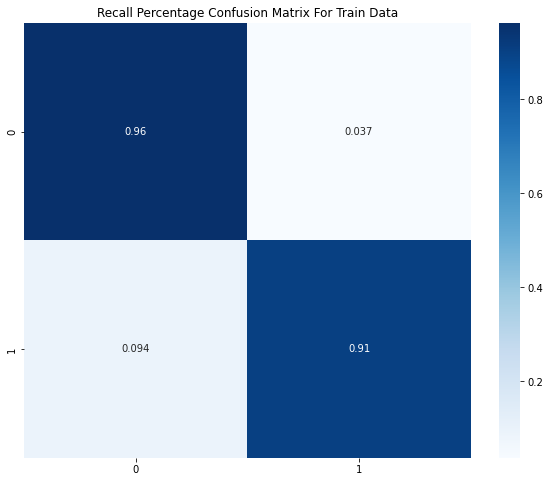

In [ ]:
# recall percentage confusion matrix for training data for class 1 and class 0
CM = confusion_matrix(y_train, y_pred)
CM = ((CM.T) / CM.sum(axis = 1)).T
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Recall Percentage Confusion Matrix For Train Data")
plt.show()

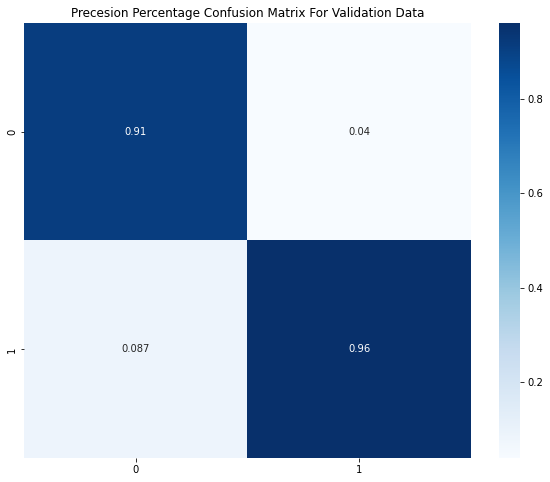

In [ ]:
# precision percentage confusion matrix for training data for class 1 and class 0
CM = confusion_matrix(y_val, model.predict(x_valid))
CM = CM / CM.sum(axis = 0)
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Precesion Percentage Confusion Matrix For Validation Data")
plt.show()

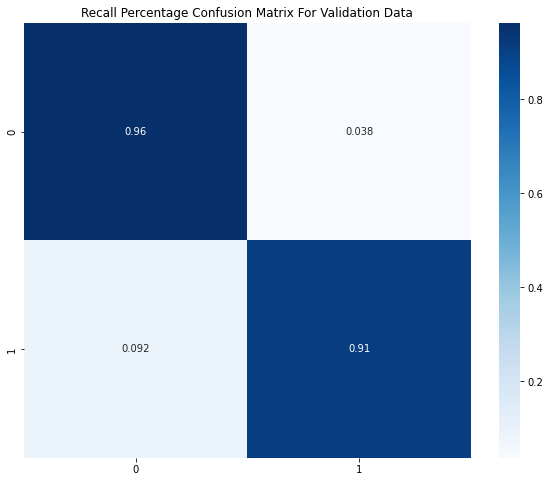

In [ ]:
# recall percentage confusion matrix for training data for class 1 and class 0
CM = confusion_matrix(y_val, model.predict(x_valid))
CM = ((CM.T) / CM.sum(axis = 1)).T
plt.figure(figsize = (10, 8))
sns.heatmap(CM, annot = True, cmap = "Blues")
plt.title("Recall Percentage Confusion Matrix For Validation Data")
plt.show()

# Getting Feature Importance

In [ ]:
cols = cols.tolist()
cols.extend(["u_" + str(i) for i in range(1, 65)])

In [ ]:
importance = sorted(list(zip(np.abs(model.coef_[0]),cols)))

In [ ]:
vals = [i[0] for i in importance]

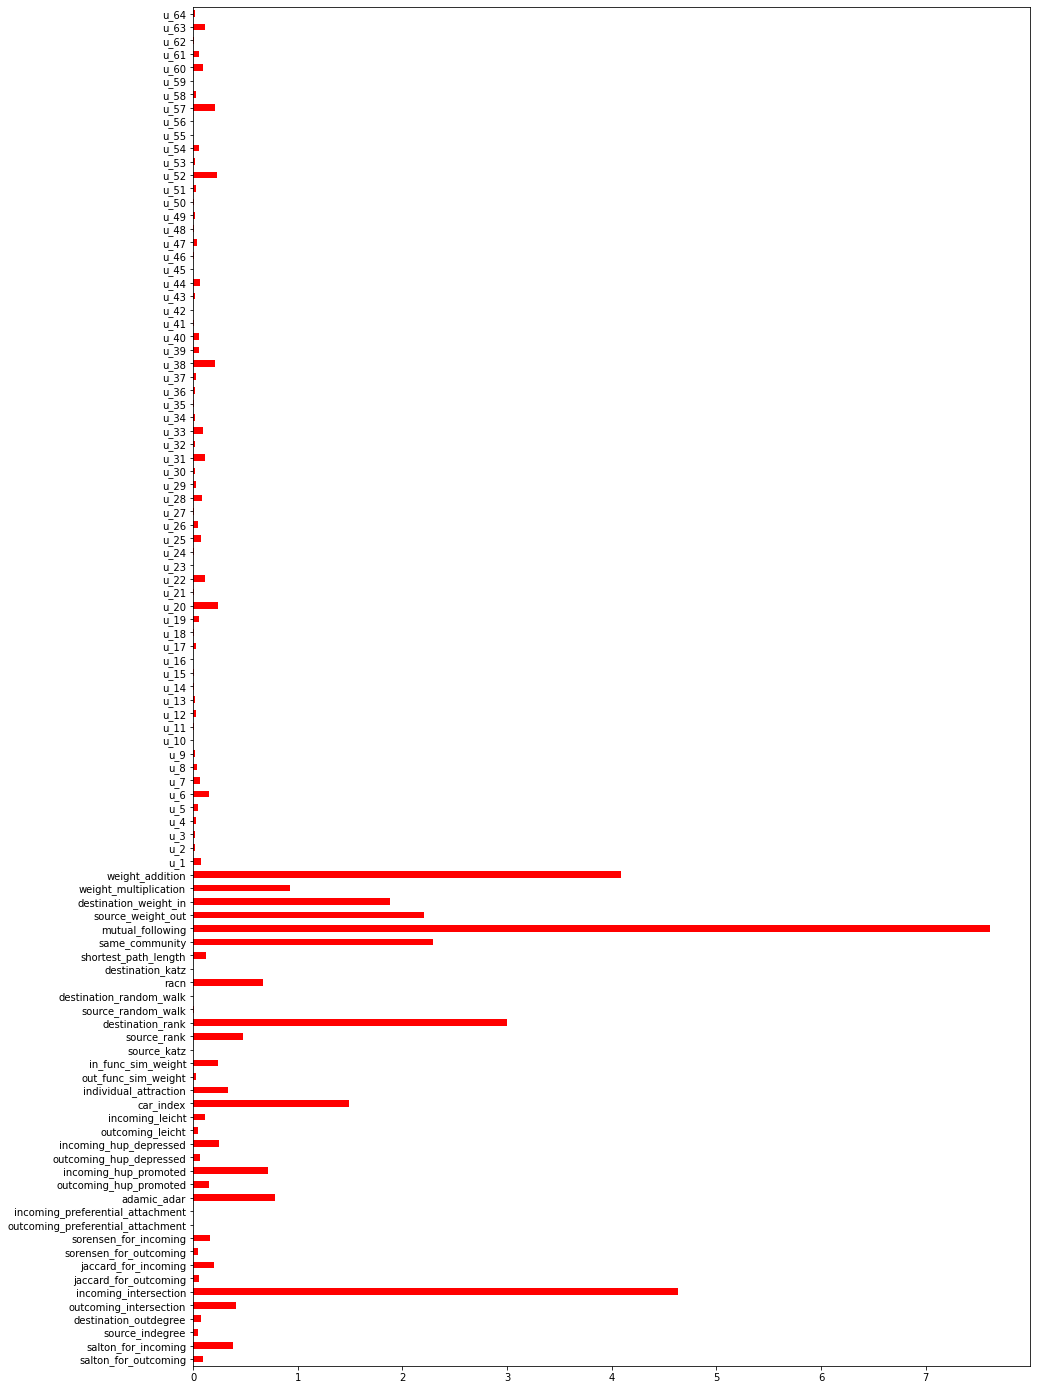

In [ ]:
plt.figure(figsize = (15, 25))
(pd.Series(np.abs(model.coef_[0]), index = cols)).plot(kind = "barh", color = "red")
plt.show()

From the chart above we can notice that the handcraft features that I designed are the most important and the most informative features while the embedding features based on graph learning are less important, next I will try Neural Network algorithm to try to improve the prediction power.